In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
df = pd.read_csv("D:\Matana\Semester 4\komputasi statistik\diabetes.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Upank\AppData\Local\Temp\ipykernel_14444\3028282848.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("D:\Matana\Semester 4\komputasi statistik\diabetes.csv")


,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.310000,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.440000,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.640000,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.630000,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.720000,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,41506,296.0,369,46.0,6.4,16.110001,Louisa,53,male,69.0,173.0,medium,138.0,94.0,130.0,94.0,35.0,39.0,210.0
399,41507,284.0,89,54.0,5.3,4.390000,Louisa,51,female,63.0,154.0,medium,140.0,100.0,146.0,102.0,32.0,43.0,180.0
400,41510,194.0,269,38.0,5.1,13.630000,Louisa,29,female,69.0,167.0,small,120.0,70.0,NaN,NaN,33.0,40.0,20.0
401,41752,199.0,76,52.0,3.8,4.490000,Louisa,41,female,63.0,197.0,medium,120.0,78.0,NaN,NaN,41.0,48.0,255.0


## Melakukan Eksplorasi data

In [23]:
print(df.describe())

                 id        chol    stab.glu         hdl       ratio  \
count    403.000000  403.000000  403.000000  403.000000  403.000000   
mean   15978.310174  207.836228  106.672457   50.434243    4.520844   
std    11881.122124   44.390656   53.076655   17.242563    1.725810   
min     1000.000000   78.000000   48.000000   12.000000    1.500000   
25%     4792.500000  179.000000   81.000000   38.000000    3.200000   
50%    15766.000000  204.000000   89.000000   46.000000    4.200000   
75%    20336.000000  230.000000  106.000000   59.000000    5.400000   
max    41756.000000  443.000000  385.000000  120.000000   19.299999   

            glyhb         age      height      weight       bp.1s       bp.1d  \
count  403.000000  403.000000  403.000000  403.000000  403.000000  403.000000   
mean     5.565583   46.851117   66.019851  177.579404  136.893300   83.305211   
std      2.210020   16.312333    3.894070   40.291258   22.599389   13.505247   
min      2.680000   19.000000   52.0

In [13]:
print(df.isnull().sum())

id            0
chol          1
stab.glu      0
hdl           1
ratio         1
glyhb        13
location      0
age           0
gender        0
height        5
weight        1
frame        12
bp.1s         5
bp.1d         5
bp.2s       262
bp.2d       262
waist         2
hip           2
time.ppn      3
dtype: int64


In [14]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [15]:
print(df.isnull().sum())

id           0
chol         0
stab.glu     0
hdl          0
ratio        0
glyhb        0
location     0
age          0
gender       0
height       0
weight       0
frame       12
bp.1s        0
bp.1d        0
bp.2s        0
bp.2d        0
waist        0
hip          0
time.ppn     0
dtype: int64


In [16]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Upank\AppData\Local\Temp\ipykernel_14444\4072275310.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [17]:
print(df.isnull().sum())

id          0
chol        0
stab.glu    0
hdl         0
ratio       0
glyhb       0
location    0
age         0
gender      0
height      0
weight      0
frame       0
bp.1s       0
bp.1d       0
bp.2s       0
bp.2d       0
waist       0
hip         0
time.ppn    0
dtype: int64


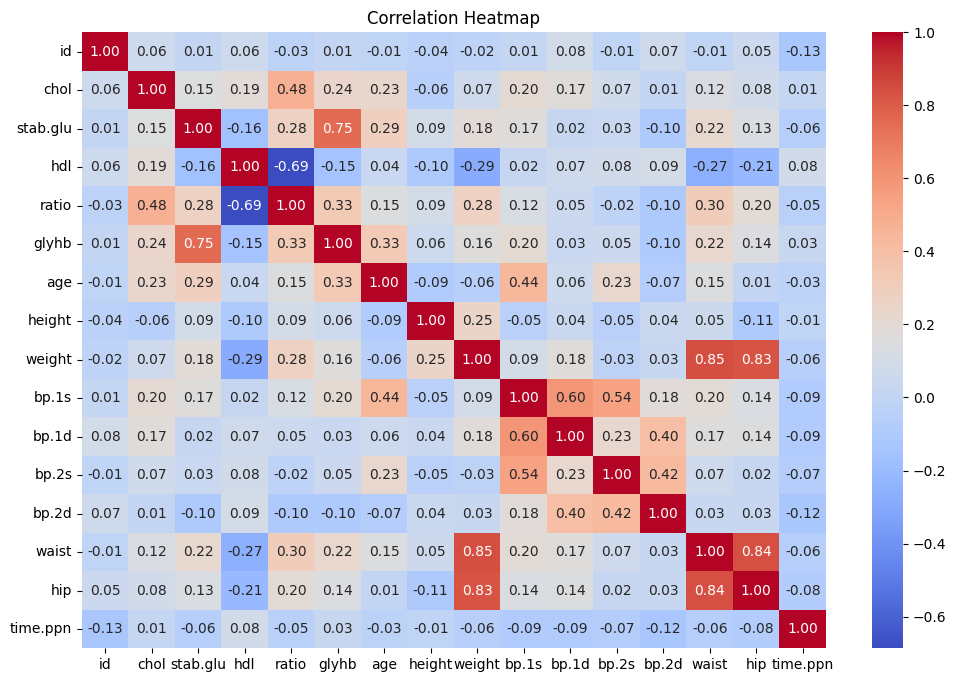

In [19]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])  # Pastikan hanya variabel numerik
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [41]:
X = X = df.select_dtypes(include=[np.number])
y = (df['glyhb'] > 6.5).astype(int)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.26224848, -0.10908241, -0.46542354, ..., -1.55839461,
        -0.89330314,  1.23165957],
       [-1.26216421, -0.96618248, -0.18246213, ...,  1.41972574,
         0.88097565,  0.06329831],
       [-1.26207994,  0.45479922, -0.2767826 , ...,  1.94527639,
         2.47782656, -0.52088231],
       ...,
       [ 2.1516003 , -0.3120798 ,  3.06216206, ..., -0.85766041,
        -0.53844739, -1.04015398],
       [ 2.17199407, -0.19930347, -0.57860811, ...,  0.54380799,
         0.88097565, -0.27747372],
       [ 2.17233115, -1.10151407, -0.35223898, ...,  1.94527639,
         2.65525444,  1.81584019]])

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9629629629629629

In [44]:
pca = PCA(0.95)  
df_pca = pca.fit_transform(X_scaled)
df_pca.shape

(403, 11)

In [46]:
pca.explained_variance_ratio_

array([0.218927  , 0.14435738, 0.12355254, 0.08073654, 0.07191685,
       0.07010449, 0.06592408, 0.05214663, 0.04971071, 0.04621415,
       0.03208444])

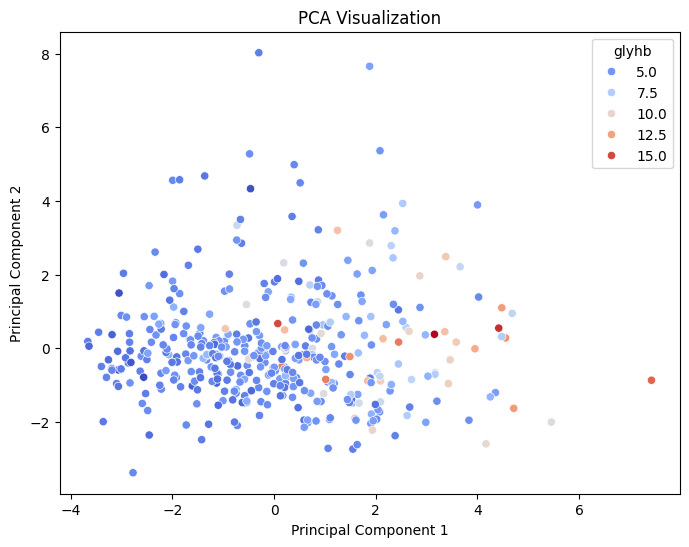

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=df['glyhb'], palette='coolwarm')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization")
plt.show()